# Practical example of machine learning with *Iris flower data set*

## The *Iris flower data set*

The Iris flower data set is a common test case for machine learning.
This data set consists of 50 samples of tree different species of Iris ( = 150 peaces of data). Each sample is defined by 4 different features. The fact, that you can define the species of the Iris by the combination of the features makes it a good case for our first machine learning approach.<br>
Lets take a closer look at the data set.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./src/iris.csv')
df.head()

In [ ]:
df.shape

In [ ]:
type(df)

In [ ]:
l = len(df['species'])
print (l)

In [ ]:
colors = {'Iris-setosa' : 'r', 'Iris-versicolor' : 'g', 'Iris-virginica' : 'b'}
print(colors)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
for i in range(len(df['sepal_length'])):
    l = df['petal_length'][i]
    w = df['petal_width'][i]
    sp = df['species'][i]
    col = colors[df['species'][i]]
    ax.scatter(l, w, color=col)

ax.set_title('Iris data')
ax.set_xlabel('petal length')
ax.set_ylabel('petal width')

In [ ]:
import seaborn as sns
sns.pairplot(df.iloc[:,1:6],hue="species")

In [ ]:
species_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} # turning each specie to an integer

df['species'] = df['species'].map(species_to_int)
df.head()

Now we have a clear understanding of the data and can proceed to our machine learning algorithm

## Preprocessing the data set
First we need to transform the dataset into train data, test data and label data.
As well as turning the ```pandas``` data frame into a 2-dimensional array

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#splitting the labels from the features (we take only the values to recieve a ndarray)
X = df.iloc[:,:-1].values # these are the features
y = df.iloc[:,-1].values # these are the labels
print(X)
print(y)

In [ ]:
#transforming the labels to a (3, 150) array
encoder =  LabelEncoder() 
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values 
print(Y)

In [ ]:
#splitting the data set into train data and test data. The test data is used to evaluate the model
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print('X_train:', X_train.shape, ' y_train:', y_train.shape)
print('X_test:', X_test.shape, ' y_test:', y_test.shape)

# Multilayer perceptron

We learned in the video(s) to neural networks that perceptrons and multilayer perceptrons are learning trough the adaption of weights during the process.
The same is happening in Keras with the ["Dense layer"](https://keras.io/api/layers/core_layers/dense/) and is described with the following formula:<br> ```output = activation(dot(input, kernel) + bias)```<br>
- activation is the activation function
- dot is the dot product (german: Skalarprodukt) , e.g. product of vectors
- kernel is a weights matrix created by the layer<br> 
Now lets combine this formula with the model of a perceptron:<br> 
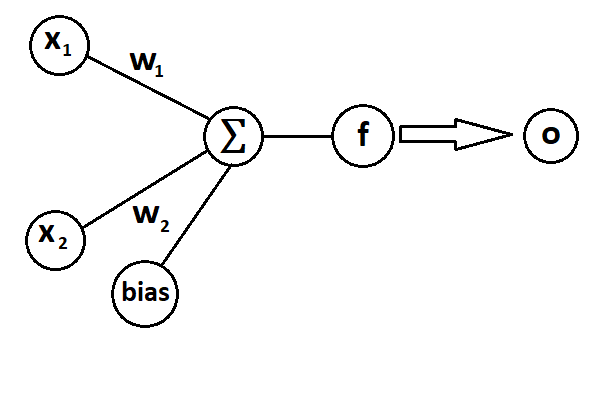

As we can see the Keras ```Dense layer``` is quite the same thing as a perceptron.
Lets take a closer look at the elements of the ```Dense layer```:

Dont worry, not all elements are important for now, but we now know most of them. 
The most important for now are:<br>
 - ```units``` defines our output, e.g. how our output is shaped
 - ```activation``` is the activation function we want to use<br> [more on activation functions](https://en.wikipedia.org/wiki/Activation_function)
 
And for the first layer we need to define the shape of the input 
 - ```input_shape=(n, m)```
 

In [ ]:
import tensorflow as tf
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, input_shape=(4, ), activation='relu', name="layer1"))
model.add(layers.Dense(3, activation='softmax', name="layer4"))

### How do we choose the correct size of the Dense layers? 
Unfortunately there are no exact rules, and the size needs to be determined by try and error.
But there is a rule of thumb where to start: 
 - First layer: Number of classes times 8
 - Second layer: Number of classes times 4
 - Third layer: Number of classes times 2
 - Forth layer: Number of classes

## Exercise
Create two additional hidden layers in the model above and adapt the ```units``` accordingly. <br>
Note: 
- ```input_shape=()``` is only required in the first layer. <br>
- use the paragraph above to calculate the number of units
Describe the differences.

## Compiling the model
#### Loss funciton
The loss function (```loss```) computes the difference between the actual output and the predicted output, e.g the error.
There are many different loss functions for different needs.<br>
In our case we have one category for each data point, e.g. an example can belong to one class only.<br>
The proper loss function in this case is the ```categorical_crossentropy```
#### Optimizer
The optimizer is updating the weight parameters (steering our model towards a right solution) to minimizing the loss function (-> minimizing the error)<br>
Out of many optimizers we choose ```adam``` for its computational efficiency.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

## Starting the training
The number of epochs is how often our dataset is passed trough our neural network. 
To achieve the learning effect we need to pass the dataset several times trough our model, so the loss function and the optimizer can do their task.

In [ ]:
history = model.fit(X_train, y_train, epochs=100)
y_pred = model.predict(X_test)

## Result
Let's take a look at the outcome of our model.

In [ ]:
num_epochs = np.arange(0, 100)
plt.figure(dpi=300)
plt.plot(num_epochs, history.history['accuracy'], label='accuracy', c='green')
plt.title('Iris MLP')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
score = model.evaluate(X_test, y_test) #Returns the loss value & metrics values for the model in test mode
score

In [ ]:
Xnew = np.array([[input("Insert sepal_length (range 4-8)"),
                  input("Insert sepal_widthh (range 2-4.5)"),
                  input("Insert petal_length (range 1-7)"),
                  input("Insert petal_width (range 0.1-2.5)")]])
#print(Xnew)
shape.Xnew

In [ ]:
Xnew = np.array([[3, 2.5, 5,  0.6]])
Xnew.shape

## Exercise

Create an array for *Iris-setosa* and run the prediction.

In [ ]:
ynew = model.predict_classes(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

In [ ]:
if ynew == 0: 
    print('Iris-setosa')
elif ynew == 2:
    print ('Iris-virginica')
else:
    print('Iris-versicolor')

In [ ]:
ynew = model.predict_proba(Xnew)
np.round(ynew, 2)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))